In [1]:
import tabs
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
import pickle
import numpy as np  
import lwreg
mol = pickle.load(open('TEST_120.pkl', 'rb'))

In [3]:
symDict = pickle.load(open('/home/braunje/symmetrySortedPlatinumSet.pkl', 'rb'))

In [4]:
sorted(symDict.keys())

[1, 2, 3, 4, 6, 8, 12, 16, 24, 32, 36, 48, 64, 72, 96, 128, 144, 288, 432, 576]

In [8]:
config = lwreg.configure_from_database(dbname='jb_flexibilitystudies',dbtype='postgresql',host='lebanon',user='braunje',lwregSchema='public')

In [38]:
allIds = lwreg.get_all_identifiers(config)

In [35]:
ans = lwreg.retrieve(config,id=symDict[144][1])
ans

{2337: ('DS5_3W0A_A\n     RDKit          3D\n\n  0  0  0  0  0  0  0  0  0  0999 V3000\nM  V30 BEGIN CTAB\nM  V30 COUNTS 71 72 0 0 0\nM  V30 BEGIN ATOM\nM  V30 1 C 13.647000 19.060000 33.761000 0\nM  V30 2 O 4.423000 25.819000 34.841000 0\nM  V30 3 C 12.495000 19.576000 34.356000 0\nM  V30 4 O 13.821000 17.710000 33.957000 0\nM  V30 5 C 12.241000 20.933000 34.221000 0\nM  V30 6 C 13.102000 21.797000 33.541000 0\nM  V30 7 C 14.230000 21.236000 32.940000 0\nM  V30 8 C 14.513000 19.879000 33.041000 0\nM  V30 9 C 12.880000 23.325000 33.577000 0\nM  V30 10 C 11.382000 23.697000 33.638000 0\nM  V30 11 C 10.929000 24.799000 34.371000 0\nM  V30 12 C 9.588000 25.169000 34.420000 0\nM  V30 13 C 9.183000 26.377000 35.228000 0\nM  V30 14 C 8.645000 24.372000 33.681000 0\nM  V30 15 C 7.231000 24.534000 33.821000 0\nM  V30 16 C 6.053000 24.617000 33.928000 0\nM  V30 17 C 4.684000 24.670000 34.154000 0\nM  V30 18 C 3.931000 24.630000 32.752000 0\nM  V30 19 C 4.217000 23.426000 34.995000 0\nM  V30 20 

In [36]:
mol = Chem.MolFromMolBlock(ans[2337][0],removeHs=False)
tabs.GetnTABS(mol)

291600

In [37]:
info = tabs.GetMultiplicityAllBonds(mol)
len(info)

12

In [42]:
import time

In [47]:
results = []
for idx in allIds:
    ans = lwreg.retrieve(config,id=idx)
    i = list(ans.keys())[0]
    mol = Chem.MolFromMolBlock(ans[i][0],removeHs=False)
    start = time.perf_counter()
    nTabs = tabs.GetnTABS(mol)
    elapsed = time.perf_counter() - start
    mol = Chem.RemoveAllHs(mol)
    matches = mol.GetSubstructMatches(mol,useChirality=True, uniquify=False)
    results.append((idx, len(matches), mol.GetNumHeavyAtoms(), elapsed))

/localhome/braunje/.conda/envs/tabsOld/lib/python3.12/site-packages/tabs/multiplicity.py:136: UserWarning: WARNING: no patterns matched by ETKDG
  warnings.warn("WARNING: no patterns matched by ETKDG",UserWarning)


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
res = pd.DataFrame(results, columns=['ID', 'SymMatches', 'NumHeavyAtoms', 'Time'])

In [61]:
np.sum(res['Time'])

107.49496376048774

In [52]:
res

,ID,SymMatches,NumHeavyAtoms,Time
0,1,16,38,0.013628
1,2,1,22,0.006649
2,3,1,27,0.007903
3,4,4,31,0.012376
4,5,2,30,0.013840
...,...,...,...,...
4543,4544,4,34,0.007462
4544,4545,1,38,0.008418
4545,4546,1,38,0.008021
4546,4547,2,24,0.005794


In [57]:
resFiltered = res[res['Time']<1]

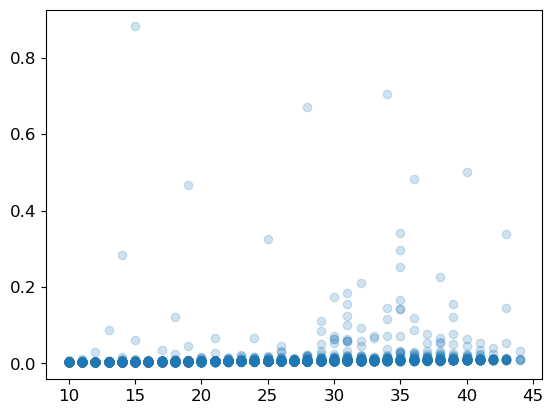

In [58]:
plt.scatter(resFiltered['NumHeavyAtoms'], resFiltered['Time'],alpha=0.2)

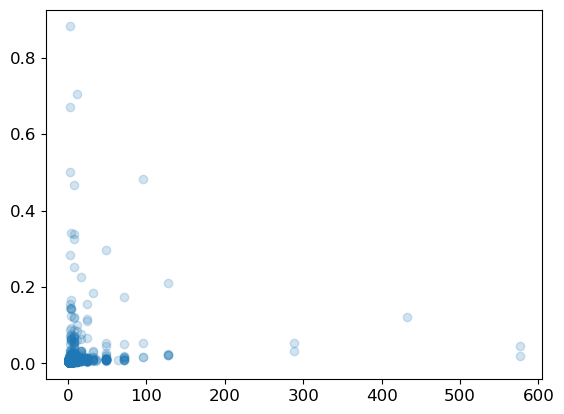

In [60]:
plt.scatter(resFiltered['SymMatches'], resFiltered['Time'],alpha=0.2)

In [8]:
cid, ts = tabs.GetTABSMultipleConfs(mol)
pickle.dump(ts, open('TEST_120_tabs_old.pkl', 'wb'))

In [9]:
tabs.GetMultiplicityAllBonds(mol)

[('[*:1][CX4:2]!@;-[O:3][$([CX3](=[!O])):4]', 'r', '50 24 35 17', 1),
 ('[$([CX3]=O):1][NX3H0:2](C)!@;-[CX4H2:3][C:4]', 'r', '21 29 25 13', 2),
 ('[$(C=O):1][NX3H0:2]!@;-[CX3:3]=[*H0:4]', 'r', '21 28 18 26', 2),
 ('[CX3:1]=[CX3:2]!@;-[CH2:3][!#1:4]', 'r', '5 13 25 29', 3),
 ('[C:1][CX4:2]!@;-[CX3:3][C:4]', 'r', '19 22 12 4', 3),
 ('[*:1][X3,X2:2]=[X3,X2:3][*:4]', 'r', '0 6 14 15', 2),
 ('[*:1][X3,X2:2]=[X3,X2:3][*:4]', 'r', '1 7 15 14', 2),
 ('[*:1][X3,X2:2]=[X3,X2:3][*:4]', 'r', '2 5 13 9', 2),
 ('[*:1][X3,X2:2]=[X3,X2:3][*:4]', 'r', '3 11 16 10', 2),
 ('[*:1][X3,X2:2]=[X3,X2:3][*:4]', 'r', '4 12 9 13', 2),
 ('[*:1][X3,X2:2]=[X3,X2:3][*:4]', 'r', '5 2 4 12', 2),
 ('[*:1][X3,X2:2]=[X3,X2:3][*:4]', 'r', '6 0 1 7', 2),
 ('[*:1][X3,X2:2]=[X3,X2:3][*:4]', 'r', '8 17 10 16', 2),
 ('[*:1][X3,X2:2]=[X3,X2:3][*:4]', 'r', '11 3 8 17', 2),
 ('[*:1][X3,X2:2]=[X3,X2:3][*:4]', 'r', '11 18 26 33', 2),
 ('[!#1;r{5-8}:1]@[C;r{5-8}:2]@;-[C;r{5-8}:3]@[!#1;r{5-8}:4]',
  'sr',
  '0 1 7 15',
  1),
 ('[!#1;

Example molecule

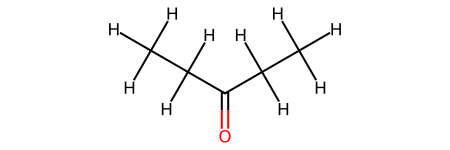

In [5]:
mol = Chem.AddHs(Chem.MolFromSmiles("CCC(=O)CC"))
mol

Checking the torsion assignments by ETKDGv3

In [6]:
tabs.GetMultiplicityAllBonds(mol)

[('[C:1][CX4H2:2]!@;-[CX3:3]=[O:4]', 'r', '0 1 2 3', 4),
 ('[C:1][CX4H2:2]!@;-[CX3:3]=[O:4]', 'r', '5 4 2 3', 4)]

Getting nTABS

In [7]:
tabs.GetnTABS(mol)

10

In [8]:
ps = AllChem.ETKDGv3()
AllChem.EmbedMolecule(mol, ps)

0

In [9]:
tabs.GetTABS(mol)

14

Getting an ensemble to then analyze it with TABS

In [10]:
AllChem.EmbedMultipleConfs(mol,50,ps)

Original CSD extracted torsion distribution and the fit as per J. Chem. Inf. Model. 2015, 55, 12, 2562–2574

In [11]:
# this part of the API is currently not available to the public
# tabs.PlotOrgDistribution('[C:1][CX4H2:2]!@;-[CX3:3]=[O:4]', 'r')

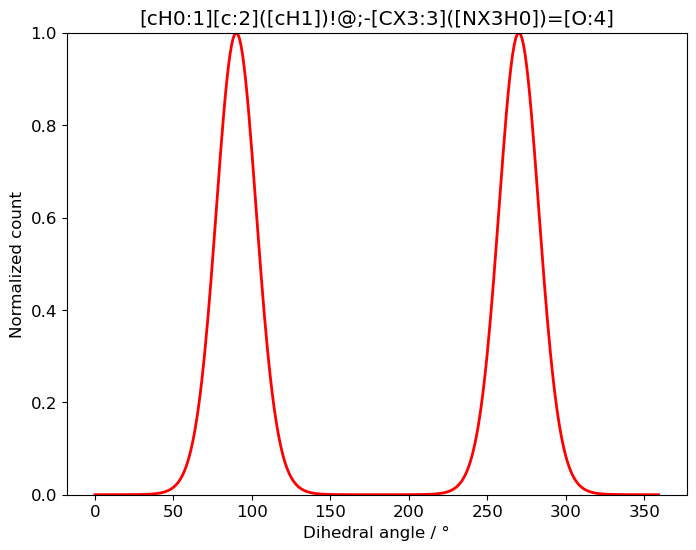

In [2]:
tabs.PlotOrgDistributionFitOnly('[cH0:1][c:2]([cH1])!@;-[CX3:3]([NX3H0])=[O:4]','r')

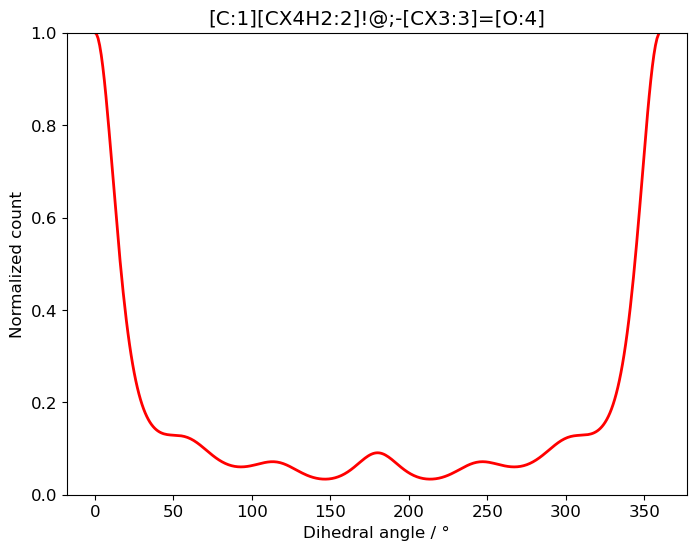

In [12]:
tabs.PlotOrgDistributionFitOnly('[C:1][CX4H2:2]!@;-[CX3:3]=[O:4]', 'r')

Checking the torsion distributions in the created ensemble

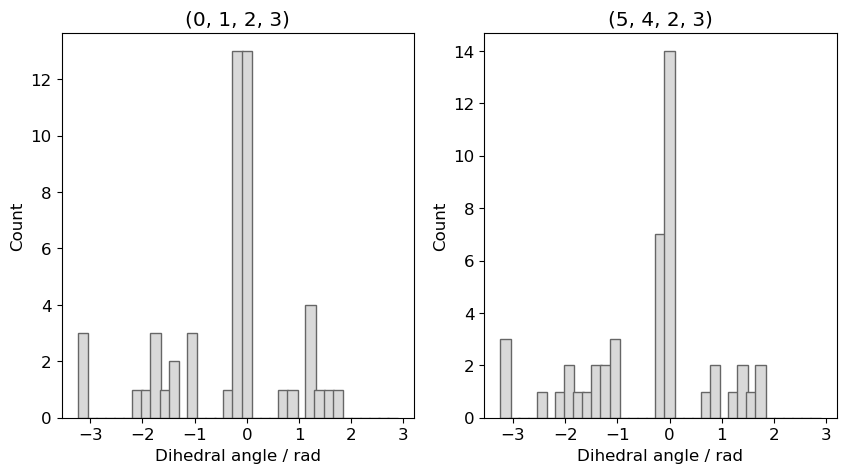

In [13]:
tabs.PlotDihedralDistributions(mol,[(0,1,2,3),(5,4,2,3)]);

Getting the TABS values for all ensemble conformers

In [14]:
cids, cTabs = tabs.GetTABSMultipleConfs(mol)

In [15]:
cTabs

[12,
 11,
 11,
 11,
 12,
 11,
 12,
 12,
 13,
 14,
 11,
 13,
 14,
 14,
 11,
 11,
 11,
 13,
 11,
 11,
 11,
 11,
 11,
 13,
 14,
 11,
 13,
 11,
 11,
 11,
 13,
 13,
 11,
 11,
 11,
 14,
 14,
 13,
 13,
 14,
 14,
 11,
 13,
 11,
 11,
 14,
 12,
 14,
 11,
 11]

Get all TABS of the conformers and return a dictionary of the sorted by TABS conformers 

In [16]:
tabsEnsemble = tabs.SortEnsembleByTABS(mol)

In [17]:
tabsEnsemble.keys()

dict_keys([12, 11, 13, 14])

Analyze the returned TABS grouping by intra and inter RMSD

In [18]:
tabs.AnalyzeTABSforIntraRmsd(mol, tabsEnsemble)

{12: [0.04322470255521693,
  0.27685215686077486,
  0.1305800318529203,
  0.2642170704198167,
  0.24693631031992533,
  0.11555847466664608,
  0.23460428515943382,
  0.21325805475520604,
  0.030924813746994437,
  0.21372232137150043],
 11: [0.04676069317557485,
  0.037722355329334226,
  0.5143703161556454,
  0.03397610875994612,
  0.5129696531491131,
  0.47044384951437546,
  0.34585978048603105,
  0.6820894533919146,
  0.09099111901798312,
  0.4710490076235992,
  0.4922394960999169,
  0.03483505368248288,
  0.02661396315459939,
  0.018455322077202997,
  0.040224132154398864,
  0.49612258019642563,
  0.00804286740857648,
  0.0536223266997575,
  0.511359685367458,
  0.496898341893324,
  0.02469003925560304,
  0.4616482034297537,
  0.05109042566680862,
  0.6177966504742656,
  0.029790260525382847,
  0.5281024590275465,
  0.024611323638506957,
  0.5250075194286004,
  0.4837410082275166,
  0.3490084354032785,
  0.6855467831221191,
  0.046565095095555814,
  0.48239951397747377,
  0.5168954977

In [19]:
tabs.AnalyzeTABSforInterRmsd(mol, tabsEnsemble)

{12: [0.5515137283268906,
  0.576725720442143,
  0.568321509498094,
  0.6897949000141937,
  0.5691559131231438,
  0.34081125822668884,
  0.3357455297369306,
  0.6643557122549727,
  0.6895316482598516,
  0.6065730119812737,
  0.3481859888199911,
  0.7165796880960047,
  0.5662251630911508,
  0.5632316774155837,
  0.5616782527380677,
  0.5712614837623659,
  0.33165353627169075,
  0.5546194107257676,
  0.5789994510388915,
  0.6951301179498741,
  0.33854470442288404,
  0.5563431284004402,
  0.3472624089535038,
  0.5769424945376591,
  0.6228997691580827,
  0.5573720574908381,
  0.5839386999697243,
  0.5738771108849896,
  0.6759458993225114,
  0.575003912174436,
  0.35027044594314316,
  0.35051892972970045,
  0.6632203202505781,
  0.6832241252920245,
  0.6151645748123684,
  0.36488189781617747,
  0.7074425552703991,
  0.5718757235828437,
  0.5689476667504573,
  0.5679279543372324,
  0.5775939037378569,
  0.34400737782961405,
  0.5603866482827412,
  0.5869488130793474,
  0.683888733376137,
  0